# Anomaly detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from scipy import stats

#### Data source: https://www.kaggle.com/aturner374/eighty-years-of-canadian-climate-data

In [2]:
df = pd.read_csv('datasets/Canadian_climate_history.csv')

In [3]:
df.head()

,LOCAL_DATE,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,...,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,MEAN_TEMPERATURE_VANCOUVER,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG
0,01-Jan-1940 00:00:00,-11.4,0.5,NaN,NaN,NaN,NaN,-8.9,0.0,NaN,...,NaN,NaN,-8.9,0.0,8.9,5.8,NaN,NaN,-20.9,0.0
1,02-Jan-1940 00:00:00,-12.0,0.5,NaN,NaN,NaN,NaN,-14.5,0.0,NaN,...,NaN,NaN,-13.1,0.3,9.7,7.1,NaN,NaN,-18.4,0.0
2,03-Jan-1940 00:00:00,-12.0,1.0,NaN,NaN,NaN,NaN,-11.1,0.0,NaN,...,NaN,NaN,-6.1,0.0,7.8,1.0,NaN,NaN,-22.0,0.0
3,04-Jan-1940 00:00:00,-11.4,0.8,NaN,NaN,NaN,NaN,-11.1,0.3,NaN,...,NaN,NaN,-6.4,0.5,8.1,0.5,NaN,NaN,-20.3,0.0
4,05-Jan-1940 00:00:00,-13.1,0.5,NaN,NaN,NaN,NaN,-8.1,0.0,NaN,...,NaN,NaN,-7.2,16.5,7.0,0.8,NaN,NaN,-18.7,0.0


In [4]:
df.describe()

,MEAN_TEMPERATURE_CALGARY,TOTAL_PRECIPITATION_CALGARY,MEAN_TEMPERATURE_EDMONTON,TOTAL_PRECIPITATION_EDMONTON,MEAN_TEMPERATURE_HALIFAX,TOTAL_PRECIPITATION_HALIFAX,MEAN_TEMPERATURE_MONCTON,TOTAL_PRECIPITATION_MONCTON,MEAN_TEMPERATURE_MONTREAL,TOTAL_PRECIPITATION_MONTREAL,...,MEAN_TEMPERATURE_STJOHNS,TOTAL_PRECIPITATION_STJOHNS,MEAN_TEMPERATURE_TORONTO,TOTAL_PRECIPITATION_TORONTO,MEAN_TEMPERATURE_VANCOUVER,TOTAL_PRECIPITATION_VANCOUVER,MEAN_TEMPERATURE_WHITEHORSE,TOTAL_PRECIPITATION_WHITEHORSE,MEAN_TEMPERATURE_WINNIPEG,TOTAL_PRECIPITATION_WINNIPEG
count,29032.000000,29048.000000,21564.000000,21575.000000,22057.000000,21995.000000,26885.000000,26454.000000,28466.000000,28491.000000,...,28413.000000,28399.000000,29147.000000,29141.000000,29168.000000,29166.000000,27530.000000,25126.000000,29097.000000,28974.000000
mean,4.038516,1.180212,2.311584,1.246239,6.565997,3.976417,5.311854,3.206377,6.675386,2.656070,...,5.007180,4.102220,7.876286,2.139786,10.149650,3.120143,-0.418710,0.729778,2.980713,1.445166
std,11.006215,3.846286,12.285520,3.887939,9.627004,9.251793,10.550237,7.338255,11.940761,6.096109,...,8.142243,8.290984,10.713931,5.570223,5.820145,6.357905,12.869909,1.970414,14.414245,4.681625
min,-37.500000,0.000000,-40.800000,0.000000,-23.500000,0.000000,-27.400000,0.000000,-30.900000,0.000000,...,-21.300000,0.000000,-24.700000,0.000000,-14.500000,0.000000,-48.100000,0.000000,-38.600000,0.000000
25%,-2.500000,0.000000,-5.800000,0.000000,-0.700000,0.000000,-2.500000,0.000000,-2.300000,0.000000,...,-1.100000,0.000000,-0.300000,0.000000,5.900000,0.000000,-8.400000,0.000000,-8.100000,0.000000
50%,5.300000,0.000000,4.200000,0.000000,7.000000,0.000000,5.800000,0.000000,7.500000,0.000000,...,4.500000,0.500000,8.200000,0.000000,10.000000,0.000000,1.900000,0.000000,4.900000,0.000000
75%,12.900000,0.500000,12.600000,0.600000,14.800000,3.000000,14.400000,2.675000,17.000000,2.200000,...,11.500000,4.300000,17.100000,1.300000,15.000000,3.400000,10.000000,0.500000,15.600000,0.550000
max,26.200000,92.600000,24.700000,75.600000,27.000000,218.200000,27.200000,131.800000,30.300000,93.500000,...,25.200000,121.200000,31.800000,126.000000,28.400000,91.600000,23.900000,44.900000,30.900000,83.800000


In [5]:
df.isna().sum()

LOCAL_DATE                           0
MEAN_TEMPERATURE_CALGARY           189
TOTAL_PRECIPITATION_CALGARY        173
MEAN_TEMPERATURE_EDMONTON         7657
TOTAL_PRECIPITATION_EDMONTON      7646
MEAN_TEMPERATURE_HALIFAX          7164
TOTAL_PRECIPITATION_HALIFAX       7226
MEAN_TEMPERATURE_MONCTON          2336
TOTAL_PRECIPITATION_MONCTON       2767
MEAN_TEMPERATURE_MONTREAL          755
TOTAL_PRECIPITATION_MONTREAL       730
MEAN_TEMPERATURE_OTTAWA             76
TOTAL_PRECIPITATION_OTTAWA          81
MEAN_TEMPERATURE_QUEBEC           1214
TOTAL_PRECIPITATION_QUEBEC        1227
MEAN_TEMPERATURE_SASKATOON        2473
TOTAL_PRECIPITATION_SASKATOON     3755
MEAN_TEMPERATURE_STJOHNS           808
TOTAL_PRECIPITATION_STJOHNS        822
MEAN_TEMPERATURE_TORONTO            74
TOTAL_PRECIPITATION_TORONTO         80
MEAN_TEMPERATURE_VANCOUVER          53
TOTAL_PRECIPITATION_VANCOUVER       55
MEAN_TEMPERATURE_WHITEHORSE       1691
TOTAL_PRECIPITATION_WHITEHORSE    4095
MEAN_TEMPERATURE_WINNIPEG

In [6]:
# Mean to nan values 
df.fillna(df.mean(), inplace=True)

#### This section used methods from: https://towardsdatascience.com/anomaly-detection-for-dummies-15f148e559c1

### EDA - Temperature in Vancouver

In [7]:
df['MEAN_TEMPERATURE_VANCOUVER'].describe()

count    29221.000000
mean        10.149650
std          5.814864
min        -14.500000
25%          5.900000
50%         10.000000
75%         15.000000
max         28.400000
Name: MEAN_TEMPERATURE_VANCOUVER, dtype: float64

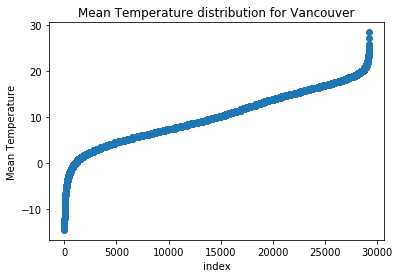

In [8]:
# Plotting distribution 
plt.scatter(range(df.shape[0]), np.sort(df['MEAN_TEMPERATURE_VANCOUVER'].values))
plt.xlabel('index')
plt.ylabel('Mean Temperature')
plt.title("Mean Temperature distribution for Vancouver")
plt.show()

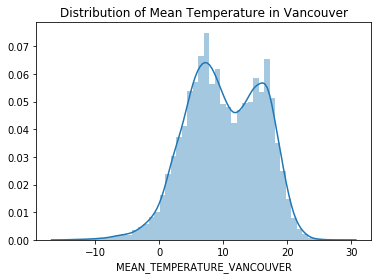

In [9]:
# Visualizing distribution
sns.distplot(df['MEAN_TEMPERATURE_VANCOUVER'])
plt.title("Distribution of Mean Temperature in Vancouver")
plt.show()

### EDA - Precipitation in Vancouver

In [12]:
df['TOTAL_PRECIPITATION_VANCOUVER'].describe()

count    29221.000000
mean         3.120143
std          6.351918
min          0.000000
25%          0.000000
50%          0.000000
75%          3.400000
max         91.600000
Name: TOTAL_PRECIPITATION_VANCOUVER, dtype: float64

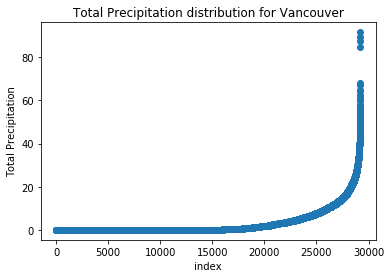

In [13]:
# Plotting distribution 
plt.scatter(range(df.shape[0]), np.sort(df['TOTAL_PRECIPITATION_VANCOUVER'].values))
plt.xlabel('index')
plt.ylabel('Total Precipitation')
plt.title("Total Precipitation distribution for Vancouver")
plt.show()

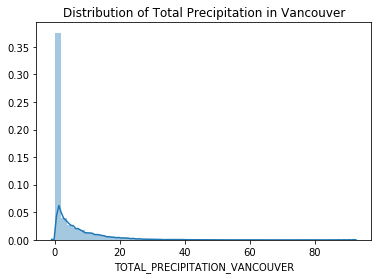

In [14]:
# Visualizing distribution
sns.distplot(df['TOTAL_PRECIPITATION_VANCOUVER'])
plt.title("Distribution of Total Precipitation in Vancouver")
plt.show()

## Univariate Anomaly detection for Mean Temperature

### Isolation forest

Isolation forest is an unsupervised learning algorithm for anomaly detection that works on the principle of isolating anomalies, instead of the most common techniques of profiling normal points.

Isolation Forest uses a different approach: instead of trying to build a model of normal instances, it explicitly isolates anomalous points in the dataset. The main advantage of this approach is the possibility of exploiting sampling techniques to an extent that is not allowed to the profile-based methods, creating a very fast algorithm with a low memory demand.- Wiki

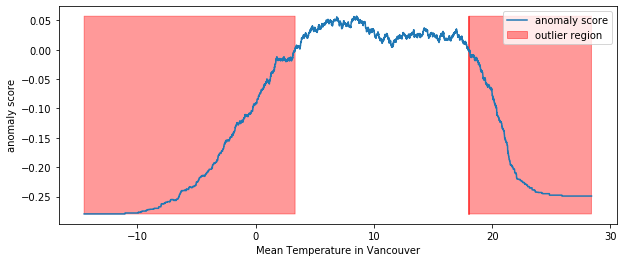

In [17]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df['MEAN_TEMPERATURE_VANCOUVER'].values.reshape(-1, 1))
xx = np.linspace(df['MEAN_TEMPERATURE_VANCOUVER'].min(), df['MEAN_TEMPERATURE_VANCOUVER'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Mean Temperature in Vancouver')
plt.show()

In Vancouver Temperature that exceeds 18 degrees and is less than 3 degrees would be considered as an outlier.

The lower the anomaly score, the more abnormal. Negative scores represent outliers, positive scores represent inliers.

## Univariate Anomaly detection for  Precipitation 

### Isolation Forest

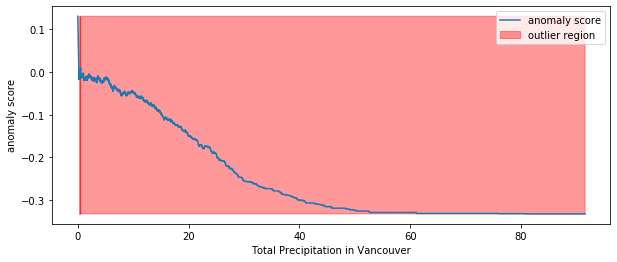

In [18]:
isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df['TOTAL_PRECIPITATION_VANCOUVER'].values.reshape(-1, 1))
xx = np.linspace(df['TOTAL_PRECIPITATION_VANCOUVER'].min(), df['TOTAL_PRECIPITATION_VANCOUVER'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Total Precipitation in Vancouver')
plt.show()

This models considers any precipitation as being anomalous anamolous. 

### Multivariate Anomaly Detection

In [83]:
X1 = df['MEAN_TEMPERATURE_VANCOUVER']
X2 = df['TOTAL_PRECIPITATION_VANCOUVER']

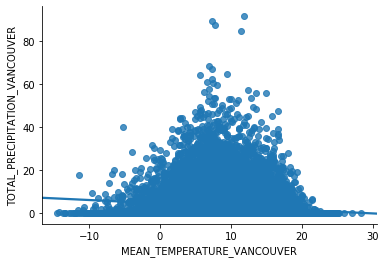

In [84]:
sns.regplot(x=X1, y=X2)
sns.despine()

In [133]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
df[['MEAN_TEMPERATURE_VANCOUVER','TOTAL_PRECIPITATION_VANCOUVER']] = scaler.fit_transform(df[['MEAN_TEMPERATURE_VANCOUVER','TOTAL_PRECIPITATION_VANCOUVER']])
df[['MEAN_TEMPERATURE_VANCOUVER','TOTAL_PRECIPITATION_VANCOUVER']].head()

,MEAN_TEMPERATURE_VANCOUVER,TOTAL_PRECIPITATION_VANCOUVER
0,0.545455,0.063319
1,0.564103,0.077511
2,0.519814,0.010917
3,0.526807,0.005459
4,0.501166,0.008734


In [134]:
X1 = df['MEAN_TEMPERATURE_VANCOUVER'].values.reshape(-1,1)
X2 = df['TOTAL_PRECIPITATION_VANCOUVER'].values.reshape(-1,1)

In [135]:
X = np.concatenate((X1,X2),axis=1)

In [137]:
X.shape

(29221, 2)

### Cluster-based Local Outlier Factor

OUTLIERS: 293 INLIERS: 28928


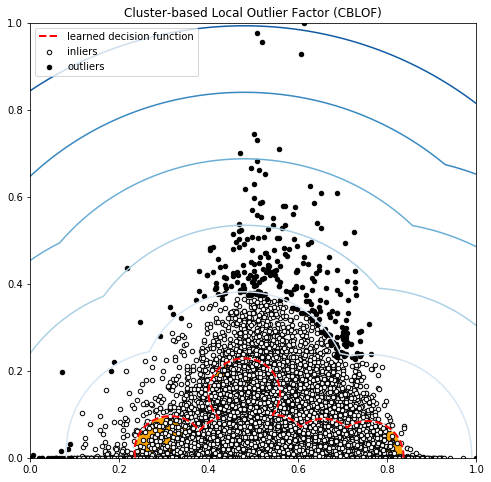

In [158]:
from pyod.models.cblof import CBLOF

outliers_fraction = 0.01

clf = CBLOF(contamination=outliers_fraction,check_estimator=False, random_state=0)
clf.fit(X)
scores_pred = clf.decision_function(X) * -1
y_pred = clf.predict(X)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)

df1 = df
df1['outlier'] = y_pred.tolist()
    
# temperature - inlier feature 1,  precipitation - inlier feature 2
inliers_temp = np.array(df1['MEAN_TEMPERATURE_VANCOUVER'][df1['outlier'] == 0]).reshape(-1,1)
inliers_prec = np.array(df1['TOTAL_PRECIPITATION_VANCOUVER'][df1['outlier'] == 0]).reshape(-1,1)
    
# temperature - outlier feature 1, precipitation - outlier feature 2
outliers_temp = df1['MEAN_TEMPERATURE_VANCOUVER'][df1['outlier'] == 1].values.reshape(-1,1)
outliers_prec = df1['TOTAL_PRECIPITATION_VANCOUVER'][df1['outlier'] == 1].values.reshape(-1,1)
         
print('OUTLIERS:',n_outliers,'INLIERS:',n_inliers)

plt.figure(figsize=(8, 8))
xx , yy = np.meshgrid(np.linspace(0, 1, 1000), np.linspace(0, 1, 1000))

threshold = np.percentile(scores_pred, 1000 * outliers_fraction)        
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
b = plt.scatter(inliers_sales, inliers_profit, c='white',s=20, edgecolor='k')
    
c = plt.scatter(outliers_sales, outliers_profit, c='black',s=20, edgecolor='k')
       
plt.axis('tight')   
plt.legend([a.collections[0], b,c], ['learned decision function', 'inliers','outliers'],
           prop=matplotlib.font_manager.FontProperties(size=10),loc='upper left')      
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.title('Cluster-based Local Outlier Factor (CBLOF)')
plt.show()


### Histogram- based outlier detection

OUTLIERS: 273 INLIERS: 28948


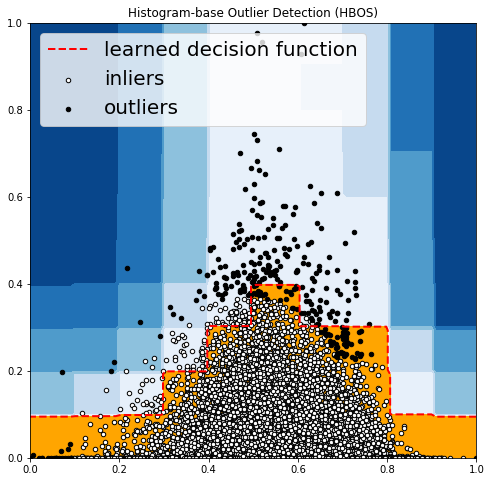

In [153]:
from pyod.models.hbos import HBOS

outliers_fraction = 0.01
xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
clf = HBOS(contamination=outliers_fraction)
clf.fit(X)
scores_pred = clf.decision_function(X) * -1
y_pred = clf.predict(X)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
plt.figure(figsize=(8, 8))
df1 = df
df1['outlier'] = y_pred.tolist()
    
# temperature - inlier feature 1,  precipitation - inlier feature 2
inliers_temp = np.array(df1['MEAN_TEMPERATURE_VANCOUVER'][df1['outlier'] == 0]).reshape(-1,1)
inliers_prec = np.array(df1['TOTAL_PRECIPITATION_VANCOUVER'][df1['outlier'] == 0]).reshape(-1,1)
    
# temperature - outlier feature 1, precipitation - outlier feature 2
outliers_temp = df1['MEAN_TEMPERATURE_VANCOUVER'][df1['outlier'] == 1].values.reshape(-1,1)
outliers_prec = df1['TOTAL_PRECIPITATION_VANCOUVER'][df1['outlier'] == 1].values.reshape(-1,1)
         
print('OUTLIERS:',n_outliers,'INLIERS:',n_inliers)
threshold = np.percentile(scores_pred, 100 * outliers_fraction)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
b = plt.scatter(inliers_sales, inliers_profit, c='white',s=20, edgecolor='k')
    
c = plt.scatter(outliers_sales, outliers_profit, c='black',s=20, edgecolor='k')
       
plt.axis('tight')      
plt.legend([a.collections[0], b,c], ['learned decision function', 'inliers','outliers'],
           prop=matplotlib.font_manager.FontProperties(size=10),loc='upper left')      
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.title('Histogram-base Outlier Detection (HBOS)')
plt.show()

### Isolation Forest

OUTLIERS:  293 INLIERS:  28928


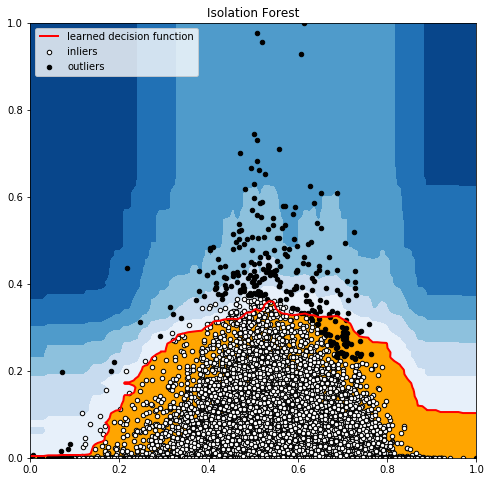

In [154]:
from pyod.models.iforest import IForest

outliers_fraction = 0.01
xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
clf = IForest(contamination=outliers_fraction,random_state=0)
clf.fit(X)
scores_pred = clf.decision_function(X) * -1

y_pred = clf.predict(X)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
plt.figure(figsize=(8, 8))

df1 = df
df1['outlier'] = y_pred.tolist()
    
# temperature - inlier feature 1,  precipitation - inlier feature 2
inliers_temp = np.array(df1['MEAN_TEMPERATURE_VANCOUVER'][df1['outlier'] == 0]).reshape(-1,1)
inliers_prec = np.array(df1['TOTAL_PRECIPITATION_VANCOUVER'][df1['outlier'] == 0]).reshape(-1,1)
    
# temperature - outlier feature 1, precipitation - outlier feature 2
outliers_temp = df1['MEAN_TEMPERATURE_VANCOUVER'][df1['outlier'] == 1].values.reshape(-1,1)
outliers_prec = df1['TOTAL_PRECIPITATION_VANCOUVER'][df1['outlier'] == 1].values.reshape(-1,1)
         
         
print('OUTLIERS: ',n_outliers,'INLIERS: ',n_inliers)

threshold = np.percentile(scores_pred, 100 * outliers_fraction)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
b = plt.scatter(inliers_sales, inliers_profit, c='white',s=20, edgecolor='k')
    
c = plt.scatter(outliers_sales, outliers_profit, c='black',s=20, edgecolor='k')
       
plt.axis('tight')
plt.legend([a.collections[0], b,c], ['learned decision function', 'inliers','outliers'],
           prop=matplotlib.font_manager.FontProperties(size=10),loc='upper left')      
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.title('Isolation Forest')
plt.show()

### K-Nearest Neighbors

OUTLIERS:  249 INLIERS:  28972


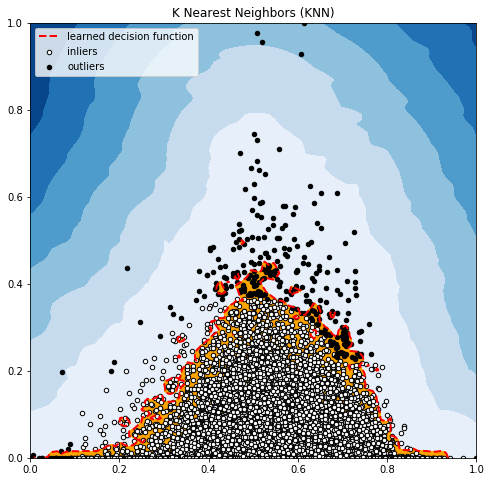

In [155]:
from pyod.models.knn import KNN

outliers_fraction = 0.01
xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
clf = KNN(contamination=outliers_fraction)
clf.fit(X)
scores_pred = clf.decision_function(X) * -1
y_pred = clf.predict(X)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)
plt.figure(figsize=(8, 8))

df1 = df
df1['outlier'] = y_pred.tolist()
    
# temperature - inlier feature 1,  precipitation - inlier feature 2
inliers_temp = np.array(df1['MEAN_TEMPERATURE_VANCOUVER'][df1['outlier'] == 0]).reshape(-1,1)
inliers_prec = np.array(df1['TOTAL_PRECIPITATION_VANCOUVER'][df1['outlier'] == 0]).reshape(-1,1)
    
# temperature - outlier feature 1, precipitation - outlier feature 2
outliers_temp = df1['MEAN_TEMPERATURE_VANCOUVER'][df1['outlier'] == 1].values.reshape(-1,1)
outliers_prec = df1['TOTAL_PRECIPITATION_VANCOUVER'][df1['outlier'] == 1].values.reshape(-1,1)
         
         
print('OUTLIERS: ',n_outliers,'INLIERS: ',n_inliers)

threshold = np.percentile(scores_pred, 100 * outliers_fraction)

Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
b = plt.scatter(inliers_sales, inliers_profit, c='white',s=20, edgecolor='k')    
c = plt.scatter(outliers_sales, outliers_profit, c='black',s=20, edgecolor='k')       
plt.axis('tight')  
plt.legend([a.collections[0], b,c], ['learned decision function', 'inliers','outliers'],
           prop=matplotlib.font_manager.FontProperties(size=10),loc='upper left')      
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.title('K Nearest Neighbors (KNN)')
plt.show()

In [156]:
pwd

'/Users/karlamuller/code/myNotebooks'